# AbiPy

### By M. Giantomassi

## Post-processing tools

* Output results are extracted from netcdf files 

* Important text files are supported as well (*.abo*, *DDB*)

* Programmatic interface exposed via *abilab* module
    
* Command line interface (*abiopen.py*, *abicomp.py* ...)

In [1]:
%matplotlib notebook

# Use seaborn settings.
import seaborn as sns
sns.set(context="notebook", style='darkgrid', palette='deep',
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

from abipy import abilab
import abipy.data as abidata

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/bandstructure.py:63: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


<IPython.core.display.Javascript object>


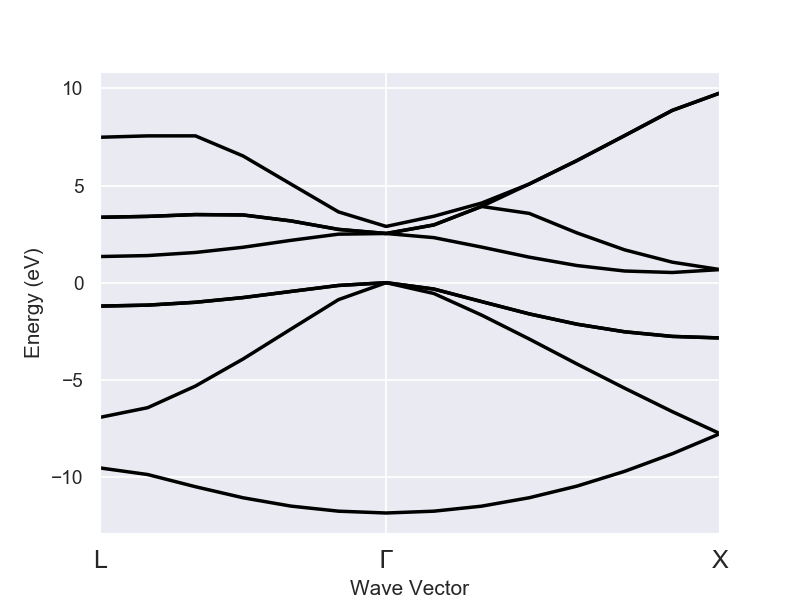

In [2]:
gsr_kpath = abilab.abiopen("si_nscf_GSR.nc")
gsr_kpath.ebands.plot();

In [3]:
with abilab.abiopen("si_scf_GSR.nc") as scf_gsr:
    ebands_kmesh = scf_gsr.ebands

<IPython.core.display.Javascript object>


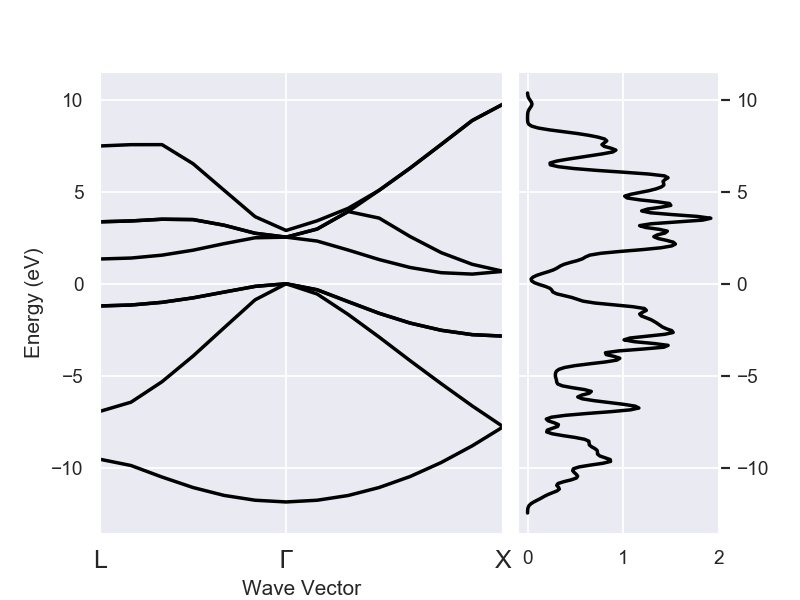

In [4]:
edos = ebands_kmesh.get_edos()
gsr_kpath.ebands.plot_with_edos(edos);

## Input file generation

AbiPy provides the AbinitInput object, a dict-like object storing the Abinit variables and providing methods to automate the specification of multiple parameters.

* Programmatic interface to generate input files with full control

* Factory functions from `abipy.abio.factories` to generate input files
  with minimal input by user (high-throughput applications)

* Can invoke Abinit to retrive important results (e.g. number of irred. DFPT perturbations)

In [5]:
inp = abilab.AbinitInput(structure=abidata.cif_file("si.cif"), 
                         pseudos="14si.pspnc", pseudo_dir=abidata.pseudo_dir)

`print(inp)` returns a string with our input

In [6]:
print(inp)

############################################################################################
#                                         STRUCTURE                                         
############################################################################################
 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005272    0.0000000000    3.6537614829
    2.1095001757    5.9665675167    3.6537614829
    0.0000000000    0.0000000000    7.3075229659


#<JSON>
#{
#    "pseudos": [
#        {
#            "basename": "14si.pspnc",
#            "type": "NcAbinitPseudo",
#            "symbol": "Si",
#            "Z": 14,
#            "Z_val": 4.0,
#            "l_max": 2,
#            "md5": "3916b143991b1cfa1542b130be320e5e",
#            "filepath": "/Users/gmatteo/git_repos/abipy/abipy/data/pseudos/14si.pspnc",
#            "@module": "py

Inside the jupyter notebook, it is possible to visualize 
the input with HTML and the links to the official ABINIT documentation:

In [7]:
inp

<AbinitInput at 112102171480>

In [8]:
# Use set_vars to set the value of several variables with a single call:
inp.set_vars(kptopt=1, 
             ngkpt=[2, 2, 2], 
             nshiftk=2, 
             shiftk=[0.0, 0.0, 0.0, 0.5, 0.5, 0.5]  # 2 shifts in one list
            )

{'kptopt': 1,
 'ngkpt': [2, 2, 2],
 'nshiftk': 2,
 'shiftk': [0.0, 0.0, 0.0, 0.5, 0.5, 0.5]}

In [9]:
# but the same results can be obtained with:

#inp.set_kmesh(ngkpt=[2, 2, 2], shiftk=[0.0, 0.0, 0.0, 0.5, 0.5, 0.5])

# Define a homogeneous k-mesh. 
# nksmall is the number of divisions to be used to sample the smallest lattice vector,
# shiftk is automatically selected from an internal database.

inp.set_autokmesh(nksmall=2)

{'ngkpt': array([2, 2, 2]),
 'kptopt': 1,
 'nshiftk': 4,
 'shiftk': array([[0.5, 0.5, 0.5],
        [0.5, 0. , 0. ],
        [0. , 0.5, 0. ],
        [0. , 0. , 0.5]])}

Generate a high-symmetry k-path (taken from an internal database)
Ten points are used to sample the smallest segment, 
the other segments are sampled so that proportions are preserved.

In [10]:


inp.set_kpath(ndivsm=10)

{'kptbounds': array([[0.   , 0.   , 0.   ],
        [0.5  , 0.   , 0.5  ],
        [0.5  , 0.25 , 0.75 ],
        [0.375, 0.375, 0.75 ],
        [0.   , 0.   , 0.   ],
        [0.5  , 0.5  , 0.5  ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.25 , 0.75 ],
        [0.5  , 0.5  , 0.5  ],
        [0.375, 0.375, 0.75 ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.   , 0.5  ]]), 'kptopt': -11, 'ndivsm': 10, 'iscf': -2}

From the Materials Project database https://www.materialsproject.org/materials/mp-149/
Remember to set the PMG_MAPI_KEY in ~/.pmgrc.yaml as described here.

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a      b      c    magmom
---  ----  -----  -----  -----  --------
  0  Si    0.875  0.875  0.875         0
  1  Si    0.125  0.125  0.125         0


<IPython.core.display.Javascript object>


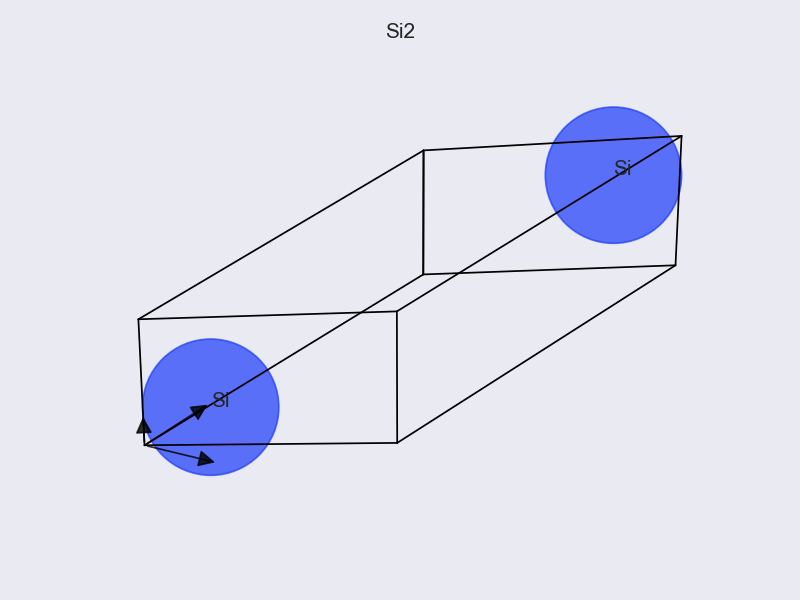

In [11]:
inp.set_structure(abilab.Structure.from_mpid("mp-149"))
print(inp.structure)
inp.structure.plot();

## Command line interface

* Command line interface:
    
    * *abistruct.py* to operate on crystalline structures read from file
    * *abiopen.py* to open output files inside Ipython session
    * *abicomp.py* to compare multiple files (convergence studies)
    * *abiview.py* for a quick visualization of output files
    * *abinp.py* to generate input files for typical calculations. 
    
Full documentation available at http://abinit.github.io/abipy/scripts/index.html

Or use `abistruct.py --help`.

## The PseudoDojo project



## DFPT calculations with AbiPy, Abiflows and Fireworks

* 

## GW calculations with AbiPy

* 